##Финальный проект

##1 ЧАСТЬ
#Аналитика зарплат в сфере гостиниц и предприятий общественного питания БЕЗ учета инфляции




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import duckdb


In [2]:
#ДАТАСЕТЫ ПО ГОСТИНИЦАМ И ПРЕДПРИЯТИЯМ ОБЩЕСТВЕННОГО ПИТАНИЯ
data2021 = pd.read_csv('https://raw.githubusercontent.com/maxgorodilov/Start_in_DS/main/HOTEL2021.csv')
data2022 = pd.read_csv('https://raw.githubusercontent.com/maxgorodilov/Start_in_DS/main/HOTEL2022.csv')
data2023 = pd.read_csv('https://raw.githubusercontent.com/maxgorodilov/Start_in_DS/main/HOTEL2023.csv')

In [3]:
data2021.head()

,month,salary
0,январь,29437.5
1,февраль,29453.1
2,март,31501.1
3,апрель,31414.2
4,май,32419.7


<ipython-input-6-a6cebfba444a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


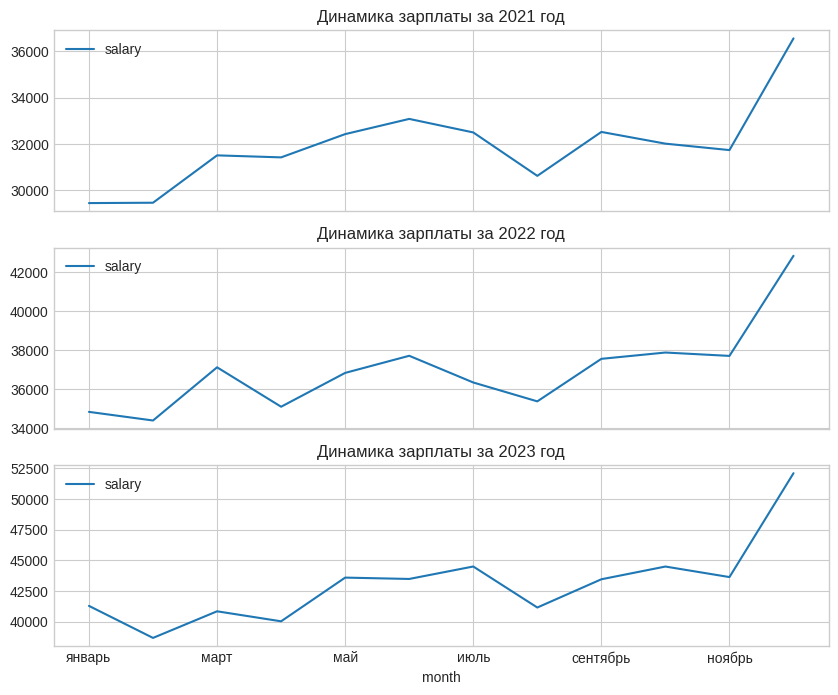

In [6]:
plt.style.use('seaborn-whitegrid')

# График динамики зарплаты за каждый год
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))
for i, df in enumerate([data2021,data2022, data2023]):
    df.plot(x='month', y='salary', kind='line', ax=axes[i])
    axes[i].set_title(f'Динамика зарплаты за {i+2021} год')





Text(0.5, 1.0, 'Динамика зарплаты за 2021-2023 гг.')

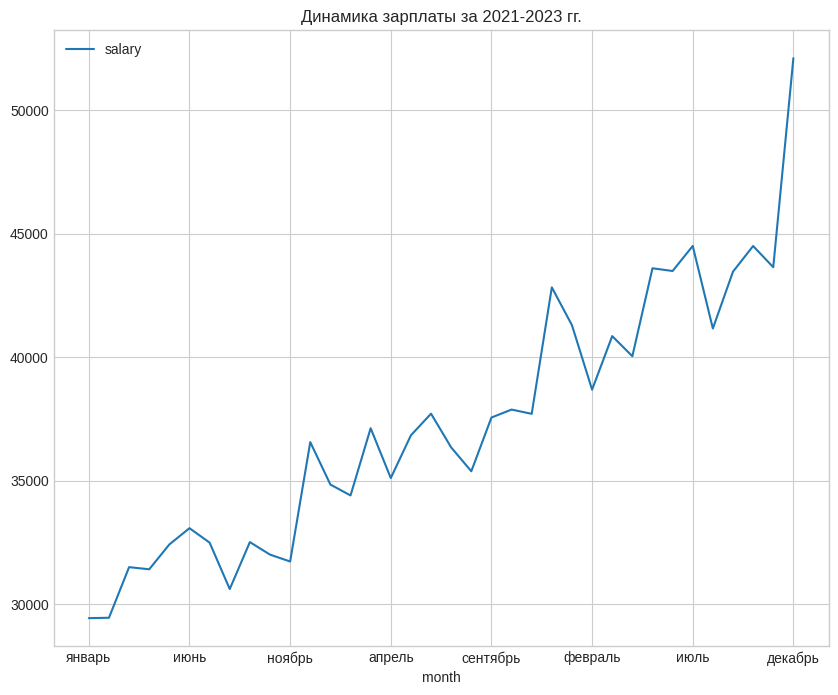

In [7]:
# График динамики зарплаты за все годы в одной линии
fig, ax = plt.subplots(figsize=(10, 8))
df_all_years = pd.concat([data2021, data2022, data2023], ignore_index=True)
df_all_years.plot(x='month', y='salary', kind='line', ax=ax)
ax.set_title('Динамика зарплаты за 2021-2023 гг.')

**Вывод:Зарплаты в сфере гостиниц и предприятий общественного питания за последние 3 года (2021-2023) выросли с 30 тысяч рублей до 50 тысяч рублей. Рост был постепенный с течением времени.\\\\**

##Часть 2
#Аналитика зарплат в сфере образование без учета инфляции

In [8]:
edu2021 = pd.read_csv('https://raw.githubusercontent.com/maxgorodilov/Start_in_DS/main/Eduction2021.csv')
edu2022 = pd.read_csv('https://raw.githubusercontent.com/maxgorodilov/Start_in_DS/main/Education2022.csv')
edu2023 = pd.read_csv('https://raw.githubusercontent.com/maxgorodilov/Start_in_DS/main/Education2023.csv')

In [9]:
edu2023.head(12)

,month,salary
0,январь,47382
1,февраль,48658
2,март,51817
3,апрель,50392
4,май,61173
5,июнь,83682
6,июль,34580
7,август,32537
8,сентябрь,53954
9,октябрь,54209


<ipython-input-10-84f833e56b18>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


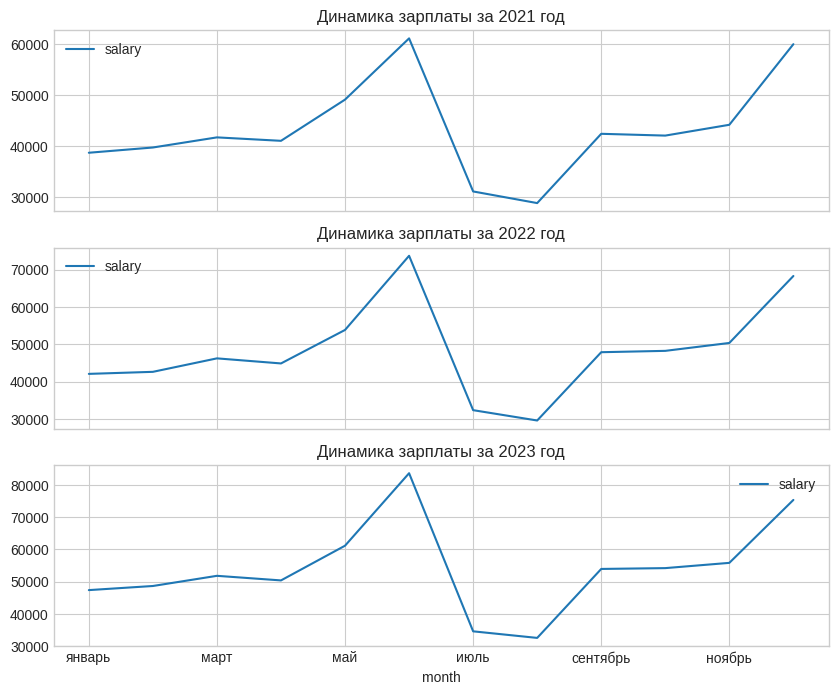

In [10]:
plt.style.use('seaborn-whitegrid')

# График динамики зарплаты за каждый год
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))
for i, df in enumerate([edu2021,edu2022, edu2023]):
    df.plot(x='month', y='salary', kind='line', ax=axes[i])
    axes[i].set_title(f'Динамика зарплаты за {i+2021} год')


Text(0.5, 1.0, 'Динамика зарплаты за 2021-2023 гг.')

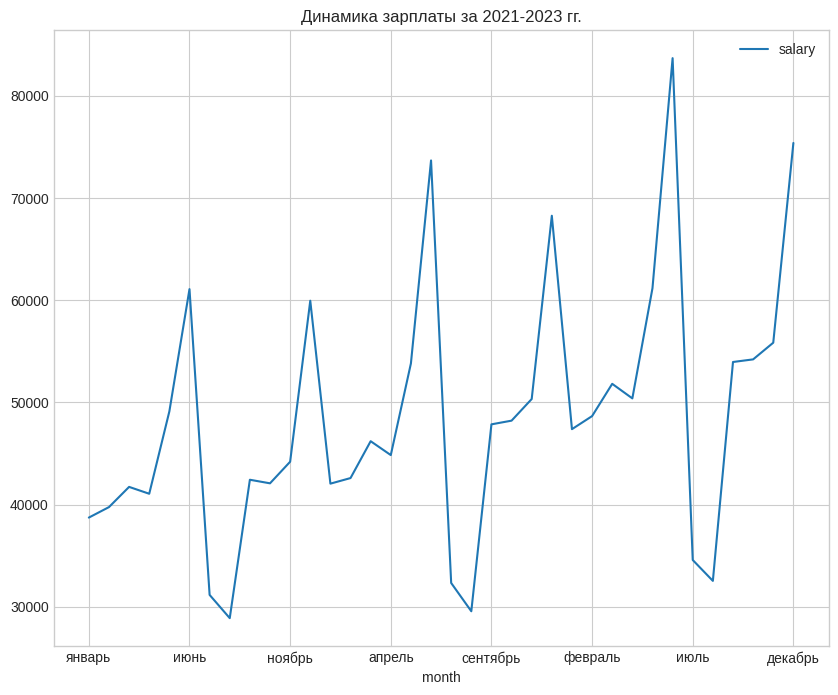

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
df_all_years = pd.concat([edu2021, edu2022, edu2023], ignore_index=True)
df_all_years.plot(x='month', y='salary', kind='line', ax=ax)
ax.set_title('Динамика зарплаты за 2021-2023 гг.')

**Вывод:с 2021 года по 2023 год зарплата в сфере образования подвержена колебаниям в диапозоне от 30 тысяч до более 70 тысяч рублей. В течении каждого года зарпалата имеет тенденцию подниматься, но не сохраняется на высоких позициях и следующий год начинается снова с зарплаты едва привышающий предыдущий год. Самая большая зарплата наблюдается в июне. Для понимания причин таких колибаний нужно будет проводить более глубокую аналитику этой сферы.**

##ЧАСТЬ 3
##Инфляция и сфера гостиниц

In [12]:
infl=pd.read_csv('https://raw.githubusercontent.com/maxgorodilov/Start_in_DS/main/INFLIATION.csv')

In [13]:
infl.head(13)

,month,inf2021,inf2022,inf2023
0,январь,0.67,0.99,0.84
1,февраль,0.78,1.17,0.46
2,март,0.66,7.61,0.37
3,апрель,0.58,1.56,0.38
4,май,0.74,0.12,0.31
5,июнь,0.69,-0.35,0.37
6,июль,0.31,-0.39,0.63
7,август,0.17,-0.52,0.28
8,сентябрь,0.60,0.05,0.87
9,октябрь,1.11,0.18,0.83


In [14]:


# Объединение данных о зарплате В СФЕРЕ ГОСТИНИЦ И ПРЕДПРИЯТИЙ ОБЩЕСТВЕННОГО ПИТАНИЯ и инфляции
comb = pd.merge(data2021, infl, on='month', how='left')
comb1 = pd.merge(data2022, infl, on='month', how='left')
comb2 = pd.merge(data2023, infl, on='month', how='left')



In [15]:
#СОЗДАНИЕ НОВОЙ КОЛОНКИ С РАСЧЕТОМ ЗАРПЛАТЫ ПОСЛЕ ВЫЧИТА ИНФЛЯЦИИ
comb['salary_with_inflation'] = comb['salary'] -(comb['salary']/100 * comb['inf2021'])
comb1['salary_with_inflation'] = comb1['salary'] -(comb1['salary']/100 * comb1['inf2022'])
comb2['salary_with_inflation'] = comb2['salary'] -(comb2['salary']/100 * comb2['inf2023'])
comb.head(12)

,month,salary,inf2021,inf2022,inf2023,salary_with_inflation
0,январь,29437.5,0.67,0.99,0.84,29240.26875
1,февраль,29453.1,0.78,1.17,0.46,29223.36582
2,март,31501.1,0.66,7.61,0.37,31293.19274
3,апрель,31414.2,0.58,1.56,0.38,31231.99764
4,май,32419.7,0.74,0.12,0.31,32179.79422
5,июнь,33077.3,0.69,-0.35,0.37,32849.06663
6,июль,32492.6,0.31,-0.39,0.63,32391.87294
7,август,30614.9,0.17,-0.52,0.28,30562.85467
8,сентябрь,32514.4,0.60,0.05,0.87,32319.31360
9,октябрь,32007.6,1.11,0.18,0.83,31652.31564


In [ ]:
ig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))
for i, df in enumerate([comb,comb1, comb2]):
    df.plot(x='month', y='salary_with_inflation', kind='line', ax=axes[i])
    axes[i].set_title(f'Динамика зарплаты за {i+2021} год')

Text(0.5, 1.0, 'Динамика зарплаты с уччетом инфляции 2021-2023 гг.')

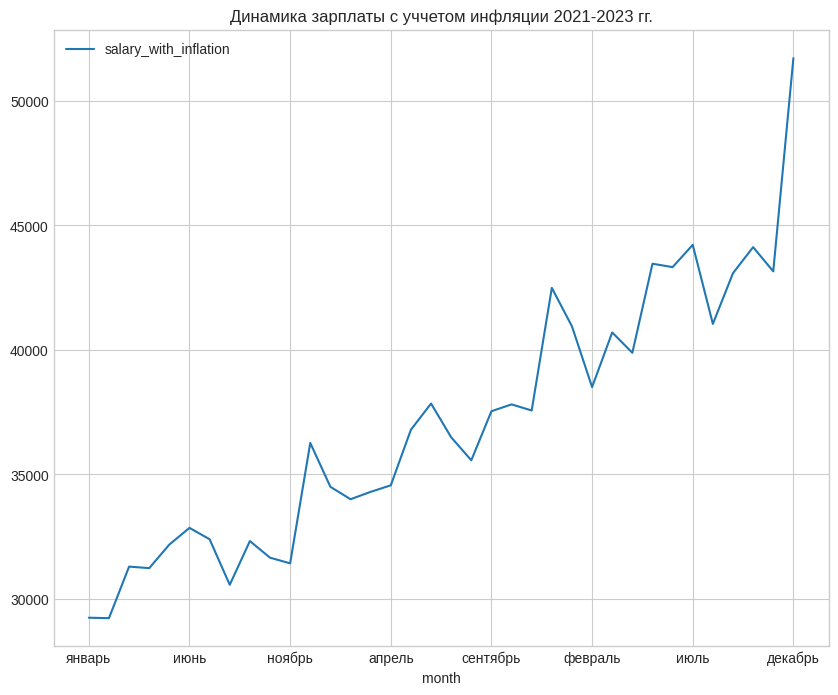

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
df_all_years = pd.concat([comb,comb1, comb2], ignore_index=True)
df_all_years.plot(x='month', y='salary_with_inflation', kind='line', ax=ax)
ax.set_title('Динамика зарплаты с учетом инфляции 2021-2023 гг.')

**Вывод:Учитывая уровень инфляции ,зарплаты в сфере гостиниц и предприятий лющественного питания  так же растут**

##ЧАСТЬ 4

Уровень заработной платы в сфере образования с учетом инфляции

In [ ]:
#ДАННЫЕ ПО СФЕРЕ ОБРАЗОВАНИЯ И ИНФЛЯЦИИ
comb_edu = pd.merge(edu2021, infl, on='month', how='left')
comb1_edu = pd.merge(edu2022, infl, on='month', how='left')
comb2_edu = pd.merge(edu2023, infl, on='month', how='left')

In [ ]:
comb_edu['salary_with_inflation'] = comb_edu['salary'] -(comb_edu['salary']/100 * comb_edu['inf2021'])
comb1_edu['salary_with_inflation'] = comb1_edu['salary'] -(comb1_edu['salary']/100 * comb1_edu['inf2022'])
comb2_edu['salary_with_inflation'] = comb2_edu['salary'] -(comb2_edu['salary']/100 * comb2_edu['inf2023'])


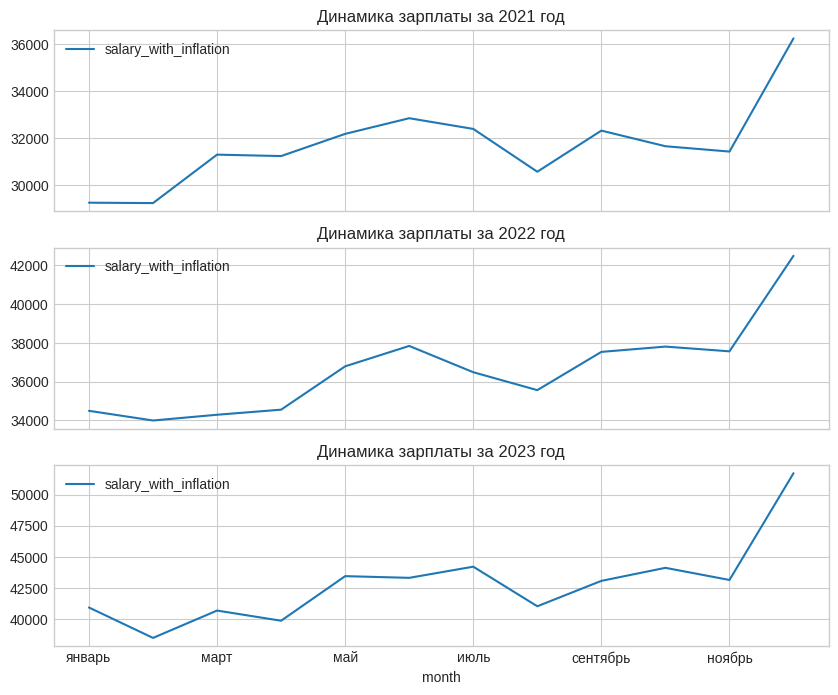

In [ ]:
ig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))
for i, df in enumerate([comb,comb1, comb2]):
    df.plot(x='month', y='salary_with_inflation', kind='line', ax=axes[i])
    axes[i].set_title(f'Динамика зарплаты за {i+2021} год')

Text(0.5, 1.0, 'Динамика зарплаты с уччетом инфляции 2021-2023 гг.')

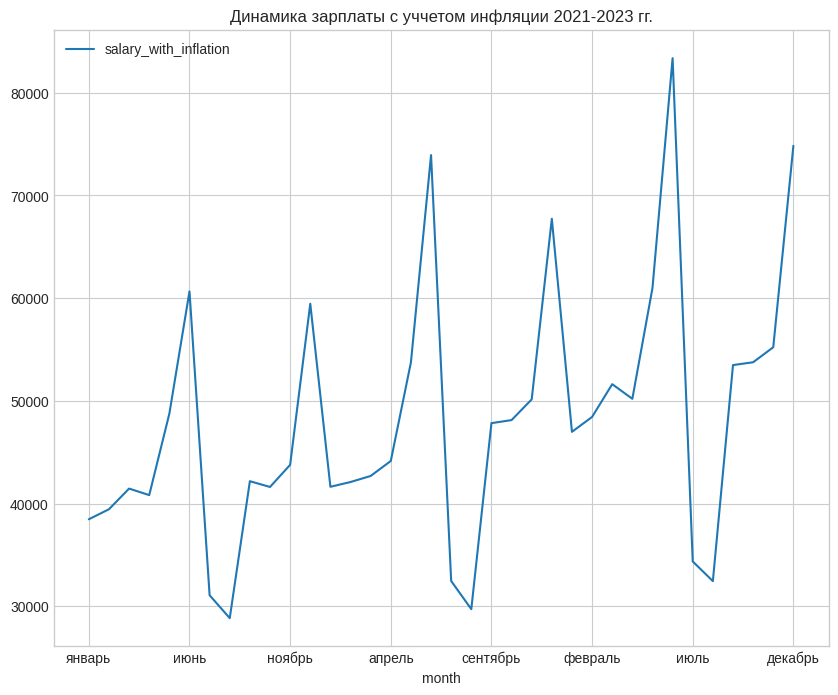

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
df_all_years = pd.concat([comb_edu,comb1_edu, comb2_edu], ignore_index=True)
df_all_years.plot(x='month', y='salary_with_inflation', kind='line', ax=ax)
ax.set_title('Динамика зарплаты с уччетом инфляции 2021-2023 гг.')

**Вывод: учитывая уровень инфляции, в течение года мы видим более плавный рост заработной платы. Но в годичных временых рамках мы так же наблюдаем колебания.**

##FINISH!!!